# Measuring Pole-Kinetochore Distance Over Time
This code is written for the efficient observation and quantification of pole-kinetochore distance. Here, you can label the kinetohcore of an ablated k-fiber stub and its corresponding spindle pole, check your labels, and plot the distance between the two (pole-kinetochore distance) over time.

In order to import the below packages, they must be downloaded and installed.

In [1]:
import cv2
import math
import matplotlib.pyplot as plt
import moviepy.editor
from moviepy.editor import VideoFileClip
from moviepy.video.tools.tracking import manual_tracking
import numpy as np
import os
import pims
from pims import Frame
import pygame

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# Smoothen Distance Data

In [2]:
def smoothenFiberData(smoothLengths, order):
    
    smoothLengths.clear()
    smoothen = []
    counter = 0
    
    for i in range(len(lengths)):
        
        smoothLengths.append(lengths[i])
    
    while counter<order:
                
        smoothL0 = (20*smoothLengths[0] + 15*smoothLengths[1] + 6*smoothLengths[2] + smoothLengths[3])/42
        smoothL1 = (15*smoothLengths[0] + 20*smoothLengths[1] + 15*smoothLengths[2] + 6*smoothLengths[3] + smoothLengths[4])/57
        smoothL2 = (6*smoothLengths[0] + 15*smoothLengths[1] + 20*smoothLengths[2] + 15*smoothLengths[3] + 6*smoothLengths[4] + smoothLengths[5])/63
        
        smoothen.append(smoothL0)
        smoothen.append(smoothL1)
        smoothen.append(smoothL2)
        
        for i in range(3,len(smoothLengths)-3):
            
            smoothLI = (smoothLengths[i-3] + 6*smoothLengths[i-2] + 15*smoothLengths[i-1] + 20*smoothLengths[i] + 15*smoothLengths[i+1] + 6*smoothLengths[i+2] + smoothLengths[i+3])/64
            smoothen.append(smoothLI)
        
        smoothLM2 = (smoothLengths[len(lengths)-6] + 6*smoothLengths[len(lengths)-5] + 15*smoothLengths[len(lengths)-4] + 20*smoothLengths[len(lengths)-3] + 15*smoothLengths[len(lengths)-2] + 6*smoothLengths[len(lengths)-1])/63
        smoothLM1 = (smoothLengths[len(lengths)-5] + 6*smoothLengths[len(lengths)-4] + 15*smoothLengths[len(lengths)-3] + 20*smoothLengths[len(lengths)-2] + 15*smoothLengths[len(lengths)-1])/57
        smoothLM0 = (smoothLengths[len(lengths)-4] + 6*smoothLengths[len(lengths)-3] + 15*smoothLengths[len(lengths)-2] + 20*smoothLengths[len(lengths)-1])/42
        
        smoothen.append(smoothLM2)
        smoothen.append(smoothLM1)
        smoothen.append(smoothLM0)
        
        smoothLengths.clear()
        
        for i in range(len(smoothen)):
            
            smoothLengths.append(smoothen[i])
        
        smoothen.clear()
        counter += 1
        
    return smoothLengths

# Load Movie
Load the selected movie as both a video (.avi file) and a series of images (with pims).

Before employing these two functions, create the necessary files using ImageJ. Since pims.open opens tiff stacks, spacially and temporally crop the original tiff stack and save the new tiff stack. Then, for the VideoFileClip method, save the new tiff stack as a .avi file. Now write the locations of these two new files into their respective functions below.

CITATIONS?

In [3]:
video = VideoFileClip(r'E:\KFiberSplaying\AblationExperiments\IntermediateVids\Fibers\Control\2021-08-04\2021-08-04_Control_1_fiber.avi').resize(4)
images = pims.open(r'E:\KFiberSplaying\AblationExperiments\IntermediateVids\Fibers\Control\2021-08-04\2021-08-04_Control_1_fiber.tif')

# Collect Important Information About Video
Calculate and print the number of frames, duration, and frame rate of the video.
These values, along with the video's frame rate, will be useful in later computations.

The frame rate is equal to the inverse of the time it takes for the microscope to image a single frame. This time per frame should be written in your notebook, in order to quickly find the video's frame rate, wiithout having to access the movie's metadata.

In [4]:
frameRate = 1/3.5         # frames/s for video IN REAL TIME (while imaging on the scope)
frames = video.duration*video.fps          # number of frames in video
duration = frames/frameRate          # duration of video IN REAL TIME (while imaging on the scope)

print(frameRate, frames, duration, video.fps)

0.2857142857142857 31.009999999999998 108.535 7.0


# Track Pole and Kinetochore
Using the manual_tracking function, identify the ablated fiber's centrosome and kinetochore.

Upon execution of the below cell, a separate window will appear, displaying the first frame in the video. Selection of the pole and kinetochore, via clicking, must be made within this window. In order to measure the correct distance, click first in the middle of the spindle pole. After the pole has been clicked in a frame, this frame will be replaced by the next frame. Once this process has been repeated for all frames, the video will start over from the first frame. Follow the same procedure for selecting the fiber's kinetochore. Once the pole and kinetochore have been identified for all frames, the separate display window will close, marking the completion of the manual_tracking function.

The output of the below cell is a text file (track.txt), containing the user-produced data from the manual_tracking function. This data is retrieved from the output text file via the next code cell.

The manual_tracking function can be viewed (in its full glory) at the below URL. https://zulko.github.io/moviepy/_modules/moviepy/video/tools/tracking.html#manual_tracking

In [5]:
# Track pole
manual_tracking(video, t1=0, t2=video.end, fps=video.fps, nobjects=1, savefile='2021-08-04_Control_1_fiber_track1.txt')          # tracks stub's corners
pygame.quit()          # closes display window

# Track kinetochore
manual_tracking(video, t1=0, t2=video.end, fps=video.fps, nobjects=1, savefile='2021-08-04_Control_1_fiber_track2.txt')          # tracks stub's corners
pygame.quit()          # closes display window

# Check Pole and Kinetochore Positions & Calculate Pole-Kinetochore Distance
Double-check your distance measurements by watching the video, which is displayed in a separate window and includes a sketch of the pole-kinetochore distance (as given by your execution of manual_tracking). This code cell also computes the pole-kinetochore distance in each frame.

If any of the reconstructed measurement sketches appear to inaccurately reflect the pole-kinetochore distance, execute the previous code cell. The data in track.txt will be updated, but you should again check these measurements the same way as before.

(In the future you may be able to check your selected pole and kinetochore positions frame-by-frame.)

CITATIONS?

In [6]:
data1 = open('2021-08-04_Control_1_fiber_track1.txt')          # load txt file containing the manual_tracking output data for stub corner positions
data2 = open('2021-08-04_Control_1_fiber_track2.txt')

# Create empty lists to fill with output splaying data
lengths = []          # splay angle values
times = []          # time stamps of video's frames

x1 = []
y1 = []
x2 = []
y2 = []

# Create variables to be used/editted displaying position selections and/or computing splay angles
counter = 0          # variable used to iterate over video's frames

# Loop over all lines in txt file - nth (non-empty) line corresponds to data from nth frame of video
for line in data1.readlines():
    
    iData1 = line.split()          # divide line into individual values for time stamp and corner positions
    
    # Execute when line is NOT empty
    if iData1[0].isdigit() == True:
        
        # Record data for current frame (extracted from current line)
        times.append(int(iData1[0])/1000*(video.fps/frameRate))          # time stamp
        x1.append(int(iData1[1]))          # vertex x-position
        y1.append(int(iData1[2]))          # vertex y-position

for line in data2.readlines():
    
    iData2 = line.split()
    
    if iData2[0].isdigit() == True:
        
        # Record data for current frame (extracted from current line)
        x2.append(int(iData2[1]))          # vertex x-position
        y2.append(int(iData2[2]))          # vertex y-position
        
        
for i in range(len(times)):
    
    #lengths.append(math.sqrt((x1[i]-x2[i])**2+(y1[i]-y2[i])**2))          # one vertex-end side
    lengths.append(math.sqrt((x1[i]-x2[i])**2+(y1[i]-y2[i])**2)/49.4576)          # one vertex-end side
    
    frame = cv2.resize(images[counter], None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)        # enlarge image of frame
    cv2.circle(frame, (x1[i],y1[i]), 4, (0,0,0), -1)          # dot on vertex
    cv2.circle(frame, (x2[i],y2[i]), 4, (0,0,0), -1)          # dot on one end
    
    cv2.imshow('Frames', frame)          # display image
    cv2.waitKey(500)          # holds image until x-ed out of window
    cv2.destroyAllWindows()          # clear image to make way for next frame
    
    iData1.clear()          # clear data from current frame
    iData2.clear()          # clear data from current frame
    counter += 1          # iterate to next frame
    
#os.remove('track.txt')          # removes txt file created by manual_tracking from computer (DOESN'T WORK YET)

# Save Data to txt File
Save the pole-kinetochore distance data to a txt file. Please change the name of the file to describe which specific video the data is from. Use the new file to compare with the data from other ablated fibers in another program.

In [7]:
newFile = open('2021-08-04_Control_1_fiber.txt','w')          # Create txt file with video-specific name

# List the video's timestamps
newFile.write('Timestamps (s)\n')
for i in range(len(times)):
    newFile.write('{}\n'.format(times[i]))

#newFile.write('\n')          # skip a line

# List the measured splay angles
newFile.write('Centrosome-Kinetochore Distance (pixels)\n')
for i in range(len(lengths)):
    newFile.write('{}\n'.format(lengths[i]))

newFile.close()

# Plot Pole-Kinetochore Distance vs Time
The cell below constructs a scater plot (with invisible dots) of the ablated k-fiber's pole-kinetochore distance over time with a red line connecting one data point to the next.

Text(0, 0.5, 'CKD ($\\mu m$)')

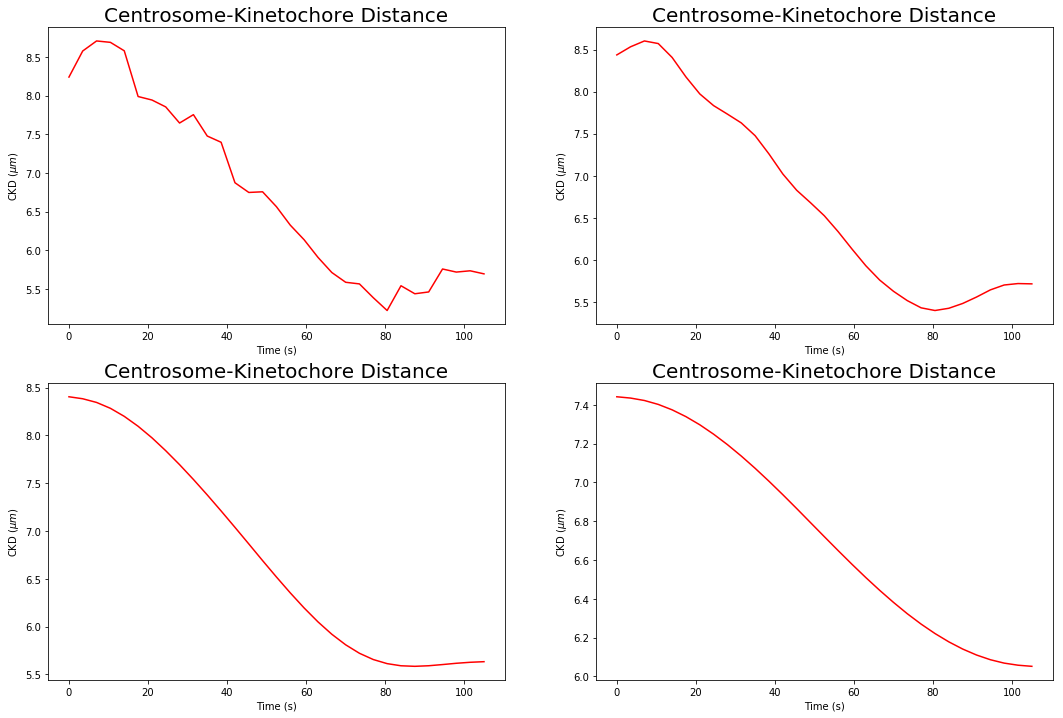

In [8]:
smoothLengths = []

fig = plt.figure(figsize=[18,12])

fig.add_subplot(2,2,1)
plt.plot(times, lengths, '-r')          # create plot
plt.title('Centrosome-Kinetochore Distance', fontsize=20)          # plot title
plt.xlabel('Time (s)')          # label x-axis
plt.ylabel('CKD ($\mu m$)')          # label y-axis

smoothFiber1 = smoothenFiberData(smoothLengths, 1)

fig.add_subplot(2,2,2)
plt.plot(times, smoothFiber1, '-r')          # create plot
plt.title('Centrosome-Kinetochore Distance', fontsize=20)          # plot title
plt.xlabel('Time (s)')          # label x-axis
plt.ylabel('CKD ($\mu m$)')          # label y-axis

smoothFiber10 = smoothenFiberData(smoothLengths, 10)

fig.add_subplot(2,2,3)
plt.plot(times, smoothFiber10, '-r')          # create plot
plt.title('Centrosome-Kinetochore Distance', fontsize=20)          # plot title
plt.xlabel('Time (s)')          # label x-axis
plt.ylabel('CKD ($\mu m$)')          # label y-axis

smoothFiber100 = smoothenFiberData(smoothLengths, 100)

fig.add_subplot(2,2,4)
plt.plot(times, smoothFiber100, '-r')          # create plot
plt.title('Centrosome-Kinetochore Distance', fontsize=20)          # plot title
plt.xlabel('Time (s)')          # label x-axis
plt.ylabel('CKD ($\mu m$)')          # label y-axis

In [23]:
print(len(images), len(times))

37 37


# Possible Improvements to Code
1) Draw angles with red lines (or any color other than grayscale)

2) Be able to edit stub corner positions for individual frames

3) Erase text file after extracting data